<a href="https://colab.research.google.com/github/Riana901/Google-Ads-Sales-Analysis/blob/main/Google_Ads_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
*   **PURPOSE**
This Analysis purpose is to see Campaign performance analysis from "Data Analytics Course" campaign in 2024 with google ads

*   **DATA OVERVIEW** :
SOURCE : https://www.kaggle.com/datasets/nayakganesh007/google-ads-sales-dataset/data

    1. Ad_ID : Unique ID of the ad campaign
    2. Campaign_Name : Name of the campaign
    3. Clicks : Number of clicks received
    4. Impressions : Number of ad impressions
    5. Cost : Total cost of the ad
    6. Leads : Number of leads generated
    7. Conversions : Number of actual conversions (signups, sales, etc.)
    8. Conversion Rate : Calculated conversion rate (Conversions ÷ Clicks)
    9. Sale_Amount : Revenue generated from the conversions
    10. Ad_Date : Date of the ad activity
    11. Location : City where the ad was served
    12. Device : Device type (Mobile, Desktop, Tablet with mixed casing)
    13. Keyword : Keyword that triggered the ad








# DATA LOAD

In [1]:
!pip install mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 11.3 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=762eedc45ee58f2894a7d23a560a8d59565692d413acea1b2e4ba8c17fd9bb14
  Stored in directory: /root/.cache/pip/wheels/e5/8d/50/ee73263c97069bd6040ff40633d444fefaac7beff73abe81a7
Successfully built jsonpath-rw


In [2]:
import mlcroissant as mlc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/nayakganesh007/google-ads-sales-dataset/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
df.head()


  -  [Metadata(Google Ads sales dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="GoogleAds_DataAnalytics_Sales_Uncleaned.csv")]


,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Ad_ID,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Campaign_Name,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Clicks,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Impressions,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Cost,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Leads,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Conversions,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Conversion+Rate,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Sale_Amount,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Ad_Date,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Location,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Device,GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Keyword
0,b'A1000',b'DataAnalyticsCourse',104.0,4498.0,b'$231.88',14.0,7.0,0.058,b'$1892',b'2024-11-16',b'hyderabad',b'desktop',b'learn data analytics'
1,b'A1001',b'DataAnalyticsCourse',173.0,5107.0,b'$216.84',10.0,8.0,0.046,b'$1679',b'20-11-2024',b'hyderabad',b'mobile',b'data analytics course'
2,b'A1002',b'Data Anlytics Corse',90.0,4544.0,b'$203.66',26.0,9.0,NaN,b'$1624',b'2024/11/16',b'hyderabad',b'Desktop',b'data analitics online'
3,b'A1003',b'Data Analytcis Course',142.0,3185.0,b'$237.66',17.0,6.0,NaN,b'$1225',b'2024-11-26',b'HYDERABAD',b'tablet',b'data anaytics training'
4,b'A1004',b'Data Analytics Corse',156.0,3361.0,b'$195.9',30.0,8.0,NaN,b'$1091',b'2024-11-22',b'hyderabad',b'desktop',b'online data analytic'


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Ad_ID            2600 non-null   object 
 1   GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Campaign_Name    2600 non-null   object 
 2   GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Clicks           2488 non-null   float64
 3   GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Impressions      2546 non-null   float64
 4   GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Cost             2503 non-null   object 
 5   GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Leads            2552 non-null   float64
 6   GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Conversions      2526 non-null   float64
 7   GoogleAds_DataAnalytics_Sales_Uncleaned.csv/Conversion+Rate  1974 non-null   f



---



# DATA CLEANSING
Data cleaning is essential to prepare the datasets for analysis. This section focuses on ensuring consistency, handling missing values, and standardizing formats across the data.

##Standardize and Inspect
Standardize column names for easier access and inspect data structure.

In [4]:
df.columns = [
    'Ad_ID', 'Campaign_Name', 'Clicks', 'Impressions', 'Cost($)', 'Leads',
    'Conversions', 'Conversion_Rate', 'Sale_Amount($)', 'Ad_Date', 'Location',
    'Device', 'Keyword'
]
display(df)

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword
0,b'A1000',b'DataAnalyticsCourse',104.0,4498.0,b'$231.88',14.0,7.0,0.058,b'$1892',b'2024-11-16',b'hyderabad',b'desktop',b'learn data analytics'
1,b'A1001',b'DataAnalyticsCourse',173.0,5107.0,b'$216.84',10.0,8.0,0.046,b'$1679',b'20-11-2024',b'hyderabad',b'mobile',b'data analytics course'
2,b'A1002',b'Data Anlytics Corse',90.0,4544.0,b'$203.66',26.0,9.0,NaN,b'$1624',b'2024/11/16',b'hyderabad',b'Desktop',b'data analitics online'
3,b'A1003',b'Data Analytcis Course',142.0,3185.0,b'$237.66',17.0,6.0,NaN,b'$1225',b'2024-11-26',b'HYDERABAD',b'tablet',b'data anaytics training'
4,b'A1004',b'Data Analytics Corse',156.0,3361.0,b'$195.9',30.0,8.0,NaN,b'$1091',b'2024-11-22',b'hyderabad',b'desktop',b'online data analytic'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,b'A3595',b'DataAnalyticsCourse',88.0,5344.0,b'$242.07',17.0,9.0,0.054,b'$1418',b'29-11-2024',b'HYDERABAD',b'MOBILE',b'online data analytic'
2596,b'A3596',b'DataAnalyticsCourse',154.0,3211.0,b'$248.28',14.0,6.0,0.039,b'$1950',b'2024/11/28',b'hyderabad',b'TABLET',b'data analitics online'
2597,b'A3597',b'Data Anlytics Corse',113.0,3808.0,b'$233.25',18.0,4.0,0.035,b'$1085',b'2024-11-02',b'Hyderbad',b'desktop',b'data anaytics training'
2598,b'A3598',b'Data Analytics Corse',196.0,5853.0,b'$220.13',16.0,7.0,0.036,b'$1558',b'2024-11-08',b'hydrebad',b'Tablet',b'data anaytics training'


The dataset was loaded using the Croissant standard with the mlcroissant library.
Some text values appeared as byte strings (like b'keyword') because the data was read in a binary format.
This can happen when files are compressed or encoded.
To fix this, the next step is convert all byte values to regular text (UTF-8) so the data can be used normally.

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        # Check if the value is a byte string before decoding
        if isinstance(df[col].iloc[0], bytes):
            df[col] = df[col].str.decode('utf-8').str.replace("'", "")

df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,DataAnalyticsCourse,88.0,5344.0,$242.07,17.0,9.0,0.054,$1418,29-11-2024,HYDERABAD,MOBILE,online data analytic
2596,A3596,DataAnalyticsCourse,154.0,3211.0,$248.28,14.0,6.0,0.039,$1950,2024/11/28,hyderabad,TABLET,data analitics online
2597,A3597,Data Anlytics Corse,113.0,3808.0,$233.25,18.0,4.0,0.035,$1085,2024-11-02,Hyderbad,desktop,data anaytics training
2598,A3598,Data Analytics Corse,196.0,5853.0,$220.13,16.0,7.0,0.036,$1558,2024-11-08,hydrebad,Tablet,data anaytics training


In [6]:
df['Sale_Amount($)']=df['Sale_Amount($)'].str.replace('$','',regex=False)
df['Cost($)']=df['Cost($)'].str.replace('$','',regex=False)
df['Cost($)']=df['Cost($)'].str.replace('₹','',regex=False)
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,231.88,14.0,7.0,0.058,1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,216.84,10.0,8.0,0.046,1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,203.66,26.0,9.0,NaN,1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,237.66,17.0,6.0,NaN,1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,195.9,30.0,8.0,NaN,1091,2024-11-22,hyderabad,desktop,online data analytic


  ## Data Type Correction
> Ensure accurate data types, particularly for date columns.


In [7]:
df['Ad_Date']=df['Ad_Date'].astype('datetime64[ns]')
df['Cost($)']=df['Cost($)'].astype('float64')
df['Sale_Amount($)']=df['Sale_Amount($)'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ad_ID            2600 non-null   object        
 1   Campaign_Name    2600 non-null   object        
 2   Clicks           2488 non-null   float64       
 3   Impressions      2546 non-null   float64       
 4   Cost($)          2503 non-null   float64       
 5   Leads            2552 non-null   float64       
 6   Conversions      2526 non-null   float64       
 7   Conversion_Rate  1974 non-null   float64       
 8   Sale_Amount($)   2461 non-null   float64       
 9   Ad_Date          2600 non-null   datetime64[ns]
 10  Location         2600 non-null   object        
 11  Device           2600 non-null   object        
 12  Keyword          2600 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 264.2+ KB


## MISSING VALUE HANDLING

In [8]:
df.isnull().sum()

,0
Ad_ID,0
Campaign_Name,0
Clicks,112
Impressions,54
Cost($),97
Leads,48
Conversions,74
Conversion_Rate,626
Sale_Amount($),139
Ad_Date,0


> The dataset contains several important columns with missing values. Here is a breakdown of the missing values by column:
* Clicks: 112 missing entries
* Impressions: 54 missing entries
* Cost(): 97 missing entries
* Leads: 48 missing entries
* Conversions: 74 missing entries
* Conversion_Rate: 626 missing entries
* Sale_Amount ($): 139 missing entries

Metode Fillna yang
Pertimbangkan median untuk kolom numerik dengan distribusi miring atau outlier.
Pertimbangkan mean untuk kolom numerik dengan distribusi normal.

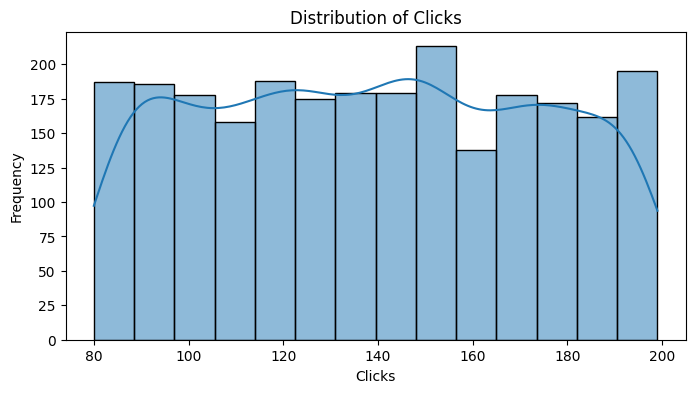

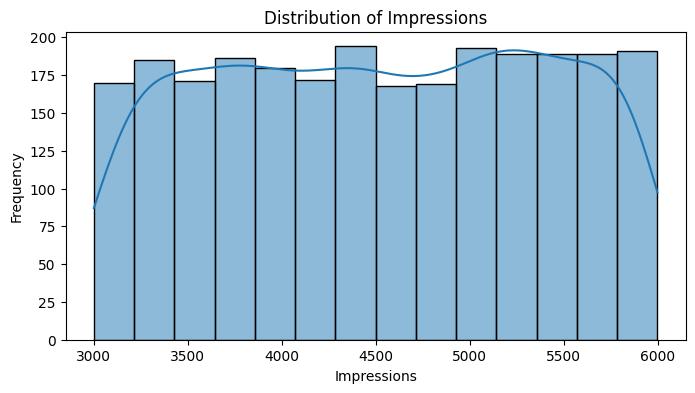

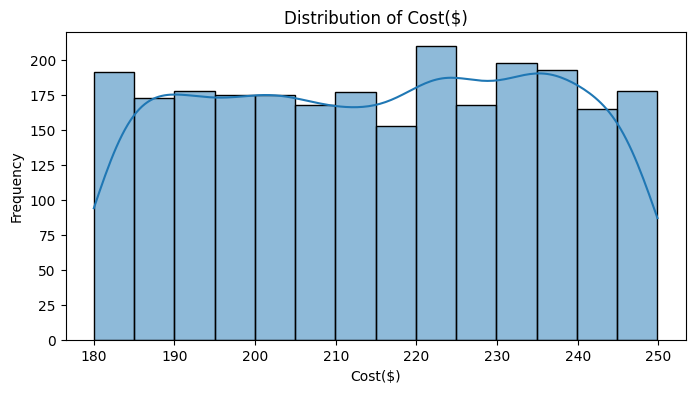

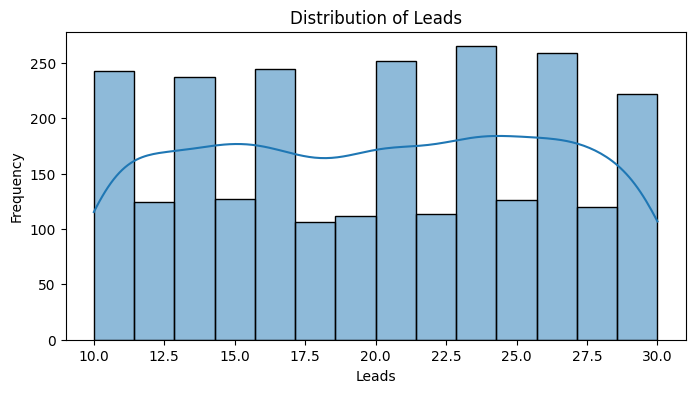

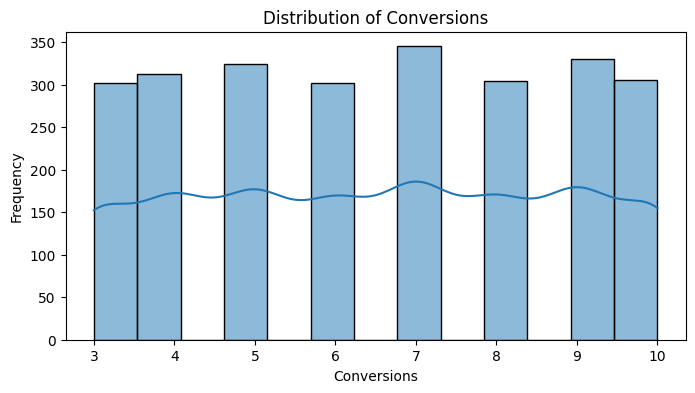

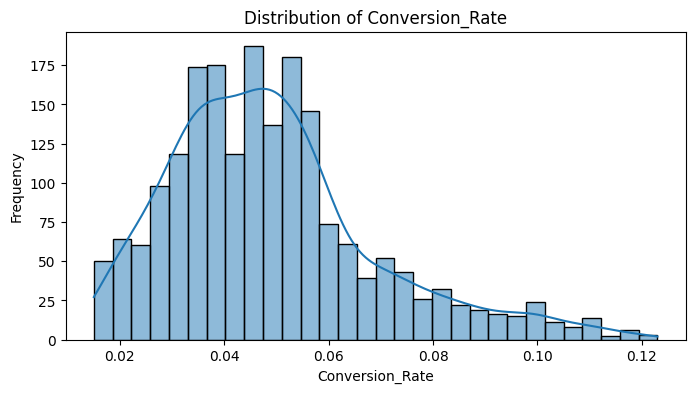

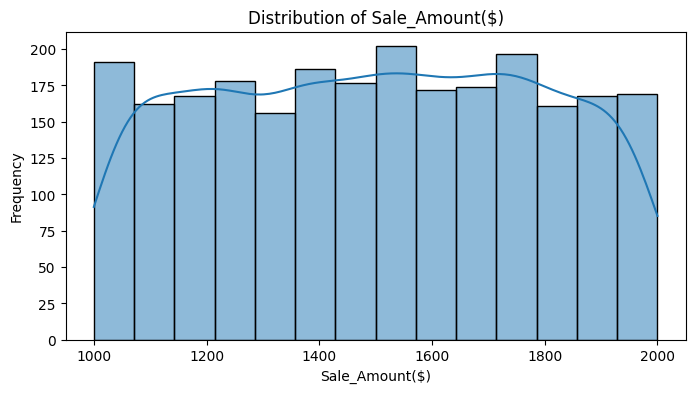

In [9]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Fill missing data with median from data.

In [10]:
df['Clicks']=df['Clicks'].fillna(df['Clicks'].mean())
df['Impressions']=df['Impressions'].fillna(df['Impressions'].median())
df['Cost($)']=df['Cost($)'].fillna(df['Cost($)'].median())
df['Leads']=df['Leads'].fillna(df['Leads'].median())
df['Conversion_Rate']=df['Conversion_Rate'].fillna(df['Conversion_Rate'].median())
df['Sale_Amount($)']=df['Sale_Amount($)'].fillna(df['Sale_Amount($)'].median())
df['Conversions']=df['Conversions'].fillna(df['Conversions'].median())

In [11]:
df.isna().sum()

,0
Ad_ID,0
Campaign_Name,0
Clicks,0
Impressions,0
Cost($),0
Leads,0
Conversions,0
Conversion_Rate,0
Sale_Amount($),0
Ad_Date,0


In [12]:
df.duplicated().sum()

np.int64(0)

## Ensuring Consistency
> In coloumn sale amount there was inconsistent symbol so



In [13]:
# Select object type columns (potential categorical columns)
object_cols = df.select_dtypes(include=['object']).columns

# Convert string values to lowercase for consistency
for col in object_cols:
  if df[col].dtype == 'object':
    df[col] = df[col].str.lower()
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword
0,a1000,dataanalyticscourse,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,hyderabad,desktop,learn data analytics
1,a1001,dataanalyticscourse,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,2024-11-20,hyderabad,mobile,data analytics course
2,a1002,data anlytics corse,90.0,4544.0,203.66,26.0,9.0,0.046,1624.0,2024-11-16,hyderabad,desktop,data analitics online
3,a1003,data analytcis course,142.0,3185.0,237.66,17.0,6.0,0.046,1225.0,2024-11-26,hyderabad,tablet,data anaytics training
4,a1004,data analytics corse,156.0,3361.0,195.90,30.0,8.0,0.046,1091.0,2024-11-22,hyderabad,desktop,online data analytic


In [14]:
print(df['Campaign_Name'].value_counts())
print(df['Location'].value_counts())
print(df['Device'].value_counts())
print(df['Keyword'].value_counts())

Campaign_Name
data analytcis course    680
data analytics corse     647
dataanalyticscourse      637
data anlytics corse      636
Name: count, dtype: int64
Location
hyderabad    1311
hyderbad      656
hydrebad      633
Name: count, dtype: int64
Device
desktop    888
mobile     878
tablet     834
Name: count, dtype: int64
Keyword
online data analytic      453
learn data analytics      444
data analytics course     440
analytics for data        429
data analitics online     420
data anaytics training    414
Name: count, dtype: int64




>



After looked from data name in every categorical coloumn, there is inconsistent and wrong typing. So i replace every wrong typing with replace method.

In [15]:
df['Campaign_Name']=df['Campaign_Name'].replace({
    'data analytcis course' : 'data analytics course',
    'data analytics corse' : 'data analytics course',
    'dataanalyticscourse' : 'data analytics course',
    'data anlytics corse' : 'data analytics course'
})
df['Location']=df['Location'].replace({
    'hyderbad' : 'hyderabad',
    'hydrebad' : 'hyderabad'
}).str.title()
df['Keyword']=df['Keyword'].replace({
    'online data analytic' : 'online data analytics',
    'data analitics online' : 'data analytics online',
    'data anaytics training' : 'data analytics training'
})

df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword
0,a1000,data analytics course,104.000000,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics
1,a1001,data analytics course,173.000000,5107.0,216.84,10.0,8.0,0.046,1679.0,2024-11-20,Hyderabad,mobile,data analytics course
2,a1002,data analytics course,90.000000,4544.0,203.66,26.0,9.0,0.046,1624.0,2024-11-16,Hyderabad,desktop,data analytics online
3,a1003,data analytics course,142.000000,3185.0,237.66,17.0,6.0,0.046,1225.0,2024-11-26,Hyderabad,tablet,data analytics training
4,a1004,data analytics course,156.000000,3361.0,195.90,30.0,8.0,0.046,1091.0,2024-11-22,Hyderabad,desktop,online data analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,a3595,data analytics course,88.000000,5344.0,242.07,17.0,9.0,0.054,1418.0,2024-11-29,Hyderabad,mobile,online data analytics
2596,a3596,data analytics course,154.000000,3211.0,248.28,14.0,6.0,0.039,1950.0,2024-11-28,Hyderabad,tablet,data analytics online
2597,a3597,data analytics course,113.000000,3808.0,233.25,18.0,4.0,0.035,1085.0,2024-11-02,Hyderabad,desktop,data analytics training
2598,a3598,data analytics course,196.000000,5853.0,220.13,16.0,7.0,0.036,1558.0,2024-11-08,Hyderabad,tablet,data analytics training


I created a new column that separates the day, month, and data to make it easier for further analysis such as exploratory.

In [16]:
df['Year'] = df['Ad_Date'].dt.year
df['Month']=df['Ad_Date'].dt.month
df['Day']=df['Ad_Date'].dt.day
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword,Year,Month,Day
0,a1000,data analytics course,104.000000,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,2024,11,16
1,a1001,data analytics course,173.000000,5107.0,216.84,10.0,8.0,0.046,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,2024,11,20
2,a1002,data analytics course,90.000000,4544.0,203.66,26.0,9.0,0.046,1624.0,2024-11-16,Hyderabad,desktop,data analytics online,2024,11,16
3,a1003,data analytics course,142.000000,3185.0,237.66,17.0,6.0,0.046,1225.0,2024-11-26,Hyderabad,tablet,data analytics training,2024,11,26
4,a1004,data analytics course,156.000000,3361.0,195.90,30.0,8.0,0.046,1091.0,2024-11-22,Hyderabad,desktop,online data analytics,2024,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,a3595,data analytics course,88.000000,5344.0,242.07,17.0,9.0,0.054,1418.0,2024-11-29,Hyderabad,mobile,online data analytics,2024,11,29
2596,a3596,data analytics course,154.000000,3211.0,248.28,14.0,6.0,0.039,1950.0,2024-11-28,Hyderabad,tablet,data analytics online,2024,11,28
2597,a3597,data analytics course,113.000000,3808.0,233.25,18.0,4.0,0.035,1085.0,2024-11-02,Hyderabad,desktop,data analytics training,2024,11,2
2598,a3598,data analytics course,196.000000,5853.0,220.13,16.0,7.0,0.036,1558.0,2024-11-08,Hyderabad,tablet,data analytics training,2024,11,8


In [17]:
df.dtypes

,0
Ad_ID,object
Campaign_Name,object
Clicks,float64
Impressions,float64
Cost($),float64
Leads,float64
Conversions,float64
Conversion_Rate,float64
Sale_Amount($),float64
Ad_Date,datetime64[ns]


# EXPLORATORY DATA ANALYSIS

## Analyze Key Metrics of Performance Marketing: CTR, CPA, and ROI


### ROI (return on investment)

ROI stands for ‘return on investment,’ and it’s used to calculate the value that an investment yields.
> ROI = (Net Profit / Cost) * 100%

From ROI we will see a key financial metric used to evaluate the efficiency of an investment. It measures the gain or loss generated relative to the initial investment amount.



In [18]:
#track campaign cost vs. return (ROI)
df['ROI(%)'] = ((df['Sale_Amount($)'] - df['Cost($)']) / df['Cost($)']) * 100
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword,Year,Month,Day,ROI(%)
0,a1000,data analytics course,104.000000,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,2024,11,16,715.939279
1,a1001,data analytics course,173.000000,5107.0,216.84,10.0,8.0,0.046,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,2024,11,20,674.303634
2,a1002,data analytics course,90.000000,4544.0,203.66,26.0,9.0,0.046,1624.0,2024-11-16,Hyderabad,desktop,data analytics online,2024,11,16,697.407444
3,a1003,data analytics course,142.000000,3185.0,237.66,17.0,6.0,0.046,1225.0,2024-11-26,Hyderabad,tablet,data analytics training,2024,11,26,415.442228
4,a1004,data analytics course,156.000000,3361.0,195.90,30.0,8.0,0.046,1091.0,2024-11-22,Hyderabad,desktop,online data analytics,2024,11,22,456.916794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,a3595,data analytics course,88.000000,5344.0,242.07,17.0,9.0,0.054,1418.0,2024-11-29,Hyderabad,mobile,online data analytics,2024,11,29,485.780972
2596,a3596,data analytics course,154.000000,3211.0,248.28,14.0,6.0,0.039,1950.0,2024-11-28,Hyderabad,tablet,data analytics online,2024,11,28,685.403577
2597,a3597,data analytics course,113.000000,3808.0,233.25,18.0,4.0,0.035,1085.0,2024-11-02,Hyderabad,desktop,data analytics training,2024,11,2,365.166131
2598,a3598,data analytics course,196.000000,5853.0,220.13,16.0,7.0,0.036,1558.0,2024-11-08,Hyderabad,tablet,data analytics training,2024,11,8,607.763594


### CTR(Click-Through Rate)
After we use ROI metric, we create a coloumn for CTR. CTR (Click-Through Rate) is a metric used to measure the percentage of users who click on an ad or link after seeing it. CTR indicates how appealing your content or advertisement is to the audience, and can be used to evaluate the effectiveness of a marketing campaign. CTR is calculated using the formula:

> CTR = Total number of clicks / total number of impressions




In [19]:
df['CTR(%)'] = (df['Clicks'] / df['Impressions']) * 100
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword,Year,Month,Day,ROI(%),CTR(%)
0,a1000,data analytics course,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,2024,11,16,715.939279,2.312139
1,a1001,data analytics course,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,2024,11,20,674.303634,3.387507
2,a1002,data analytics course,90.0,4544.0,203.66,26.0,9.0,0.046,1624.0,2024-11-16,Hyderabad,desktop,data analytics online,2024,11,16,697.407444,1.980634
3,a1003,data analytics course,142.0,3185.0,237.66,17.0,6.0,0.046,1225.0,2024-11-26,Hyderabad,tablet,data analytics training,2024,11,26,415.442228,4.458399
4,a1004,data analytics course,156.0,3361.0,195.90,30.0,8.0,0.046,1091.0,2024-11-22,Hyderabad,desktop,online data analytics,2024,11,22,456.916794,4.641476


### CPA (Cost Per Acquisition)
CPA (Cost Per Acquisition) is a marketing metric that measures the total cost to acquire a paying customer on a campaign or channel level.

In [20]:
# Calculate CPA (Cost Per Acquisition)
df['CPA'] = df['Cost($)'] / df['Conversions']
display(df.head())

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword,Year,Month,Day,ROI(%),CTR(%),CPA
0,a1000,data analytics course,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,2024,11,16,715.939279,2.312139,33.125714
1,a1001,data analytics course,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,2024,11,20,674.303634,3.387507,27.105000
2,a1002,data analytics course,90.0,4544.0,203.66,26.0,9.0,0.046,1624.0,2024-11-16,Hyderabad,desktop,data analytics online,2024,11,16,697.407444,1.980634,22.628889
3,a1003,data analytics course,142.0,3185.0,237.66,17.0,6.0,0.046,1225.0,2024-11-26,Hyderabad,tablet,data analytics training,2024,11,26,415.442228,4.458399,39.610000
4,a1004,data analytics course,156.0,3361.0,195.90,30.0,8.0,0.046,1091.0,2024-11-22,Hyderabad,desktop,online data analytics,2024,11,22,456.916794,4.641476,24.487500


In [21]:
#Save dataset for visualisation with others tools like tableu
df.to_excel('google_ads_sales_cleaned.xlsx', index=False)
print("Dataset berhasil disimpan ke google_ads_sales_cleaned.xlsx")

Dataset berhasil disimpan ke google_ads_sales_cleaned.xlsx


## Corelation of Performance Metrics
To see corelation in data i use heatmap.

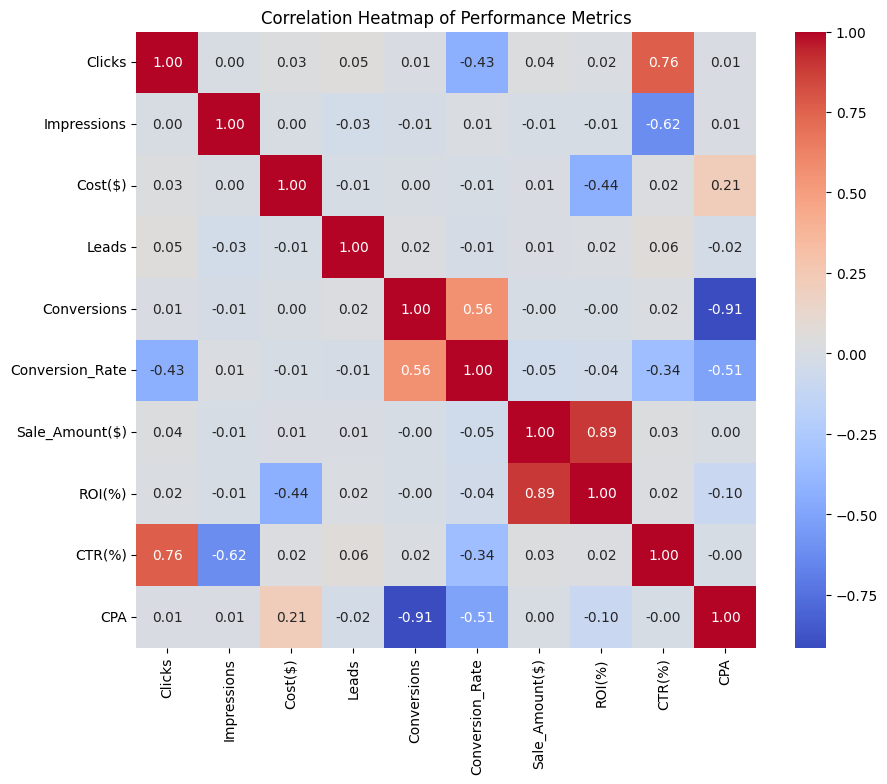

In [22]:
numeric_cols = ['Clicks', 'Impressions', 'Cost($)', 'Leads', 'Conversions',
                'Conversion_Rate', 'Sale_Amount($)', 'ROI(%)', 'CTR(%)', 'CPA']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Performance Metrics')
plt.show()

Data Distribution and Correlation Insights
- Histograms show the distributions of various performance metrics. Most appear somewhat uniformly distributed or slightly skewed.
- The correlation heatmap reveals significant relationships:
  - Strong positive correlation between 'Clicks' and 'CTR(%).'
  - Strong positive correlation between 'Conversions' and 'Sale_Amount.'
  - Strong negative correlation between 'Conversions' and 'CPA'.
  - Moderate positive correlation between 'Sale_Amount($)' and 'ROI(%).'
  - Moderate negative correlation between 'CTR(%)' and 'CPA'.

## Visualize Monthly Sales Performance Trends


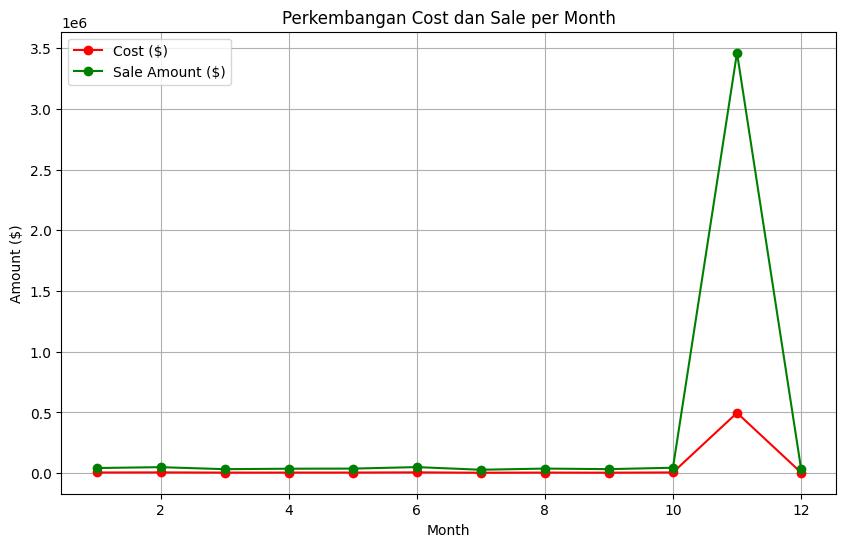

In [23]:
# Mengelompokkan data berdasarkan bulan dan menjumlahkan cost dan sales
monthly_data = df.groupby('Month')[['Cost($)', 'Sale_Amount($)']].sum()

# Membuat line chart untuk Cost dan Sale per bulan
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Cost($)'], marker='o', label='Cost ($)', color='red')
plt.plot(monthly_data.index, monthly_data['Sale_Amount($)'], marker='o', label='Sale Amount ($)', color='green')

plt.title('Perkembangan Cost dan Sale per Month')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

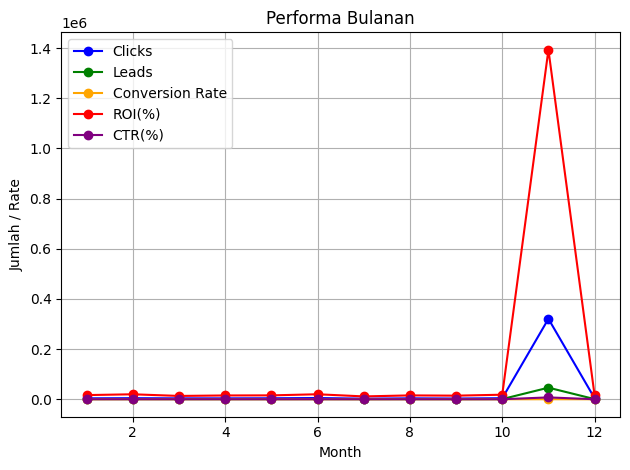

In [24]:
monthly_data = df.groupby('Month')[['Clicks', 'Keyword', 'Device', 'Leads', 'Conversion_Rate', 'ROI(%)', 'CTR(%)']].sum()
plt.plot(monthly_data.index, monthly_data['Clicks'], marker='o', label='Clicks', color='blue')
plt.plot(monthly_data.index, monthly_data['Leads'], marker='o', label='Leads', color='green')
plt.plot(monthly_data.index, monthly_data['Conversion_Rate'], marker='o', label='Conversion Rate', color='orange')
plt.plot(monthly_data.index, monthly_data['ROI(%)'], marker='o', label='ROI(%)', color='red')
plt.plot(monthly_data.index, monthly_data['CTR(%)'], marker='o', label='CTR(%)', color='purple')
plt.title('Performa Bulanan')
plt.xlabel('Month')
plt.ylabel('Jumlah / Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


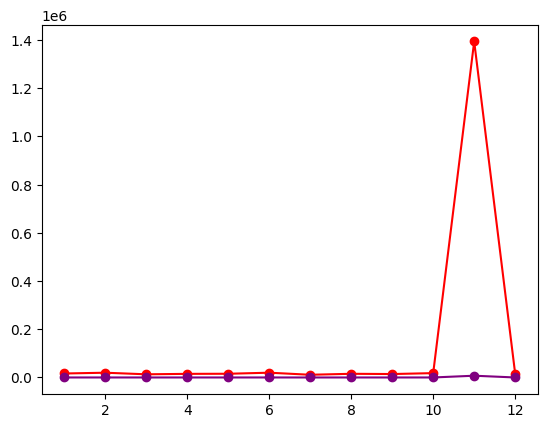

In [25]:
monthly_data = df.groupby('Month')[['ROI(%)', 'CTR(%)']].sum()
plt.plot(monthly_data.index, monthly_data['ROI(%)'], marker='o', label='ROI(%)', color='red')
plt.plot(monthly_data.index, monthly_data['CTR(%)'], marker='o', label='CTR(%)', color='purple')

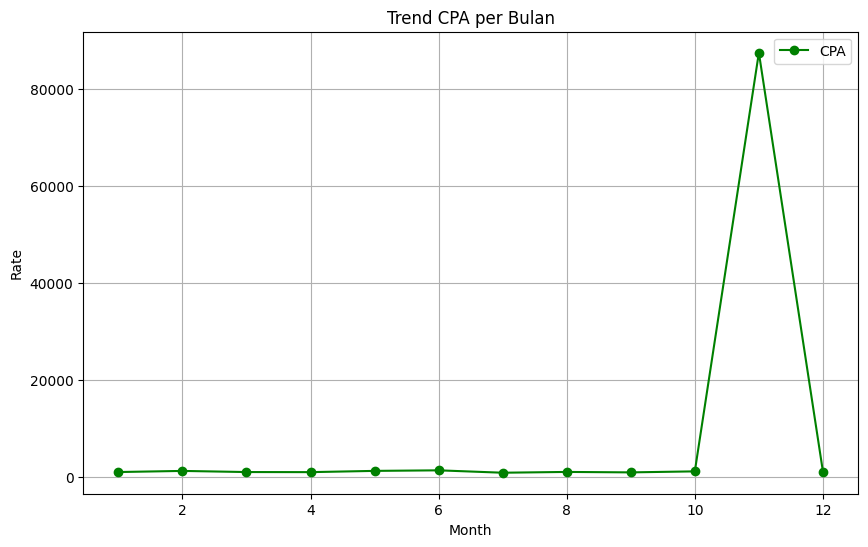

In [26]:
monthly_data = df.groupby('Month')[['CPA']].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['CPA'], marker='o', label='CPA', color='green')

plt.title('Trend CPA per Bulan')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

- The line plots show a significant spike in Cost, Sale Amount, Clicks, Leads, Conversion Rate, ROI(%), and CTR(%) in November.
- The CPA trend plot also shows a significant spike in November.
- Overall, total revenue is significantly higher than total cost.

## Daily Sales in November
Based on trends sales November was a high-performing month overall.

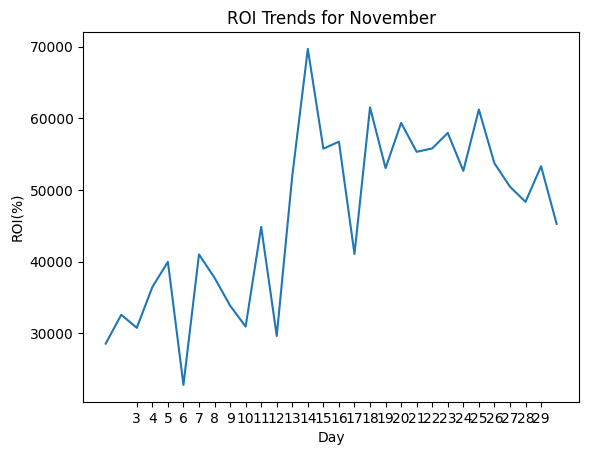

In [29]:
monthly_sales = df_november.groupby('Day')['ROI(%)'].sum().reset_index()
sns.lineplot(x='Day', y='ROI(%)', data=monthly_sales)
plt.title('ROI Trends for November')
plt.xlabel('Day')
plt.ylabel('ROI(%)')
plt.xticks(range(3,30))
plt.show()

The daily ROI trend plot for November shows significant volatility throughout the month.
- The ROI fluctuates considerably from day to day, with several peaks and dips.
- There is a notable sharp increase in ROI around the middle of the month, reaching the highest point, followed by a subsequent decrease.
- The overall trajectory for November suggests a period of intense campaign activity with varying degrees of daily effectiveness, culminating in a strong overall monthly performance despite the fluctuations.

In [27]:
df_november = df[df['Month'] == 11]
df_november.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost($),Leads,Conversions,Conversion_Rate,Sale_Amount($),Ad_Date,Location,Device,Keyword,Year,Month,Day,ROI(%),CTR(%),CPA
0,a1000,data analytics course,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,2024,11,16,715.939279,2.312139,33.125714
1,a1001,data analytics course,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,2024,11,20,674.303634,3.387507,27.105000
2,a1002,data analytics course,90.0,4544.0,203.66,26.0,9.0,0.046,1624.0,2024-11-16,Hyderabad,desktop,data analytics online,2024,11,16,697.407444,1.980634,22.628889
3,a1003,data analytics course,142.0,3185.0,237.66,17.0,6.0,0.046,1225.0,2024-11-26,Hyderabad,tablet,data analytics training,2024,11,26,415.442228,4.458399,39.610000
4,a1004,data analytics course,156.0,3361.0,195.90,30.0,8.0,0.046,1091.0,2024-11-22,Hyderabad,desktop,online data analytics,2024,11,22,456.916794,4.641476,24.487500


In [28]:
df_november.to_excel('google_ads_sales_November.xlsx', index=False)
print("Dataset berhasil disimpan")

Dataset berhasil disimpan


## Visualize key performance indicators (KPIs)

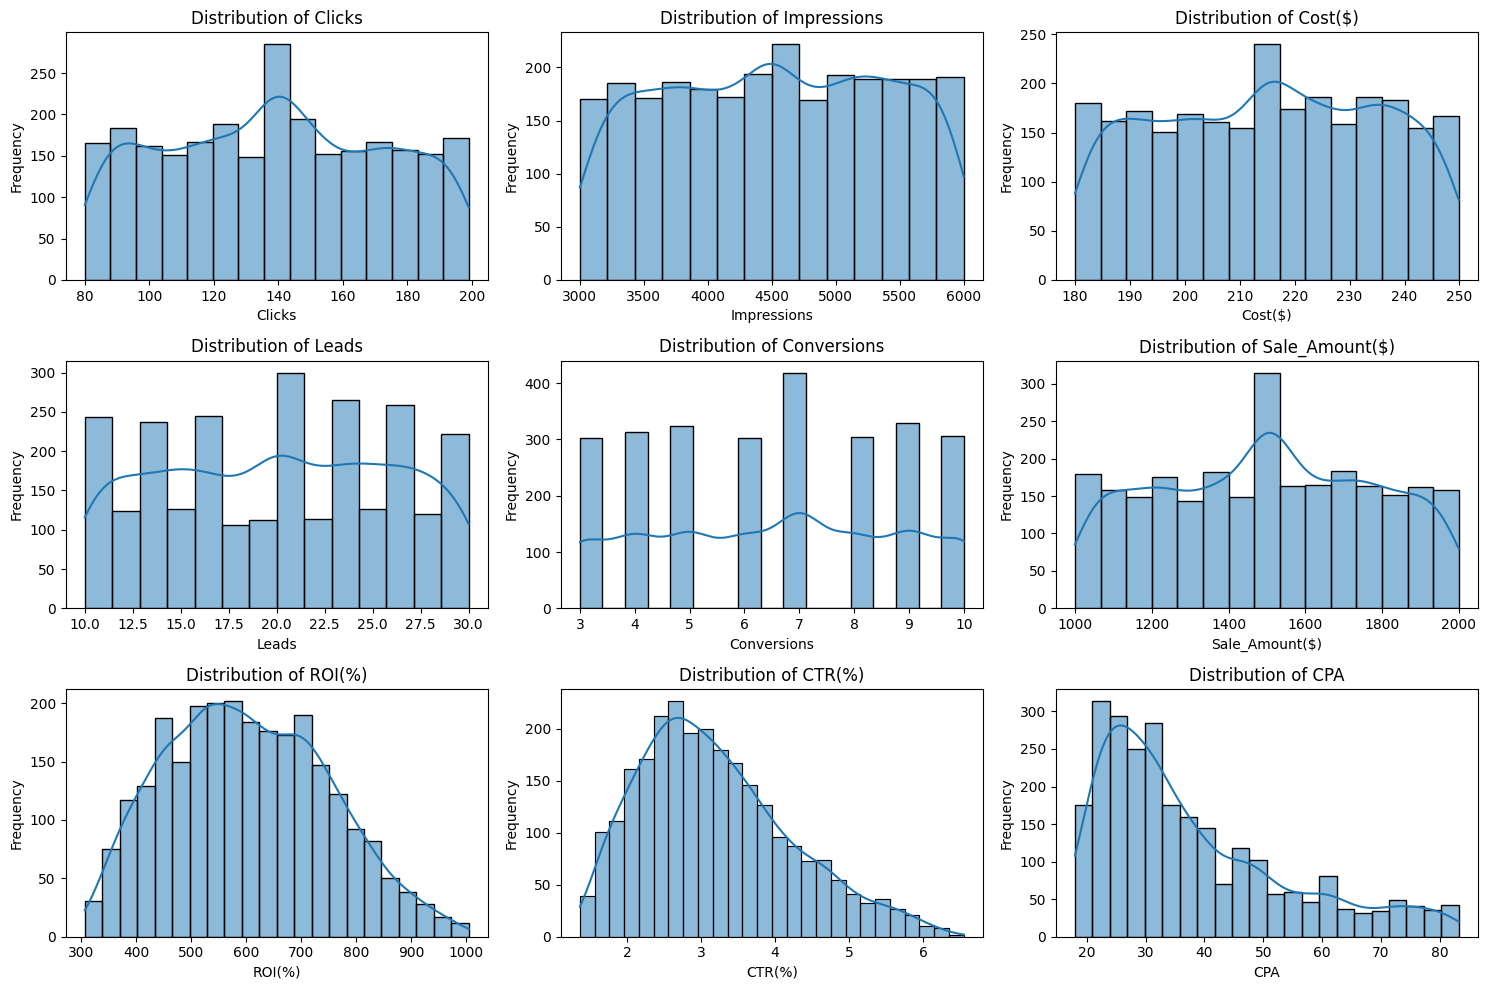

In [30]:
# Visualize key performance indicators (KPIs)
kpi_metrics = ['Clicks', 'Impressions', 'Cost($)', 'Leads', 'Conversions', 'Sale_Amount($)', 'ROI(%)', 'CTR(%)', 'CPA']

plt.figure(figsize=(15, 10))
for i, col in enumerate(kpi_metrics):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Track campaign cost vs. return (ROI)

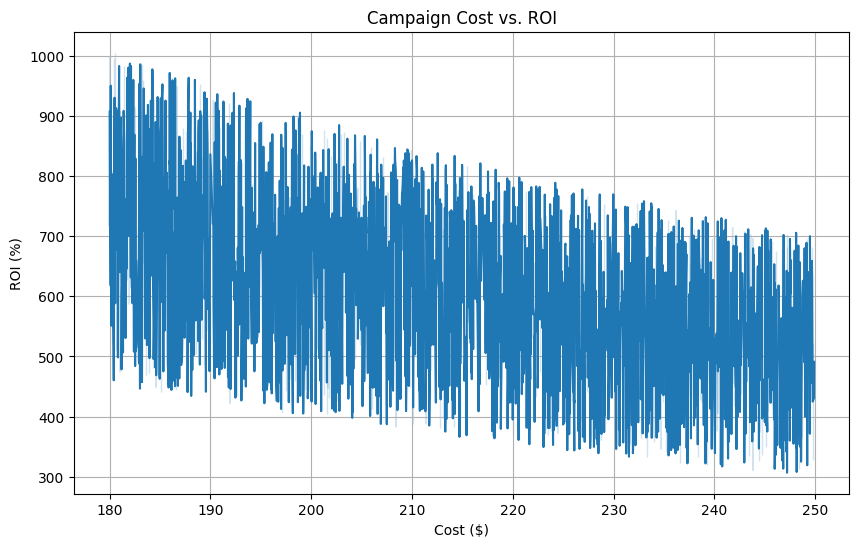

In [50]:
# Sort data by Cost for a clearer line plot
df_sorted_by_cost = df.sort_values(by='Cost($)')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted_by_cost, x='Cost($)', y='ROI(%)')
plt.title('Campaign Cost vs. ROI')
plt.xlabel('Cost ($)')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.show()

The plot shows the relationship between Campaign Cost and ROI. It seems that as the cost increases, the ROI tends to decrease.

## Analyze ROI(Return of Invesment) and CPA(Cost Per Acquisition) by Keyword

/tmp/ipython-input-4085291727.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROI(%)', y='Keyword', data=keyword_perf.sort_values(by='ROI(%)', ascending=False),
/tmp/ipython-input-4085291727.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CPA', y='Keyword', data=keyword_perf.sort_values(by='CPA', ascending=True),


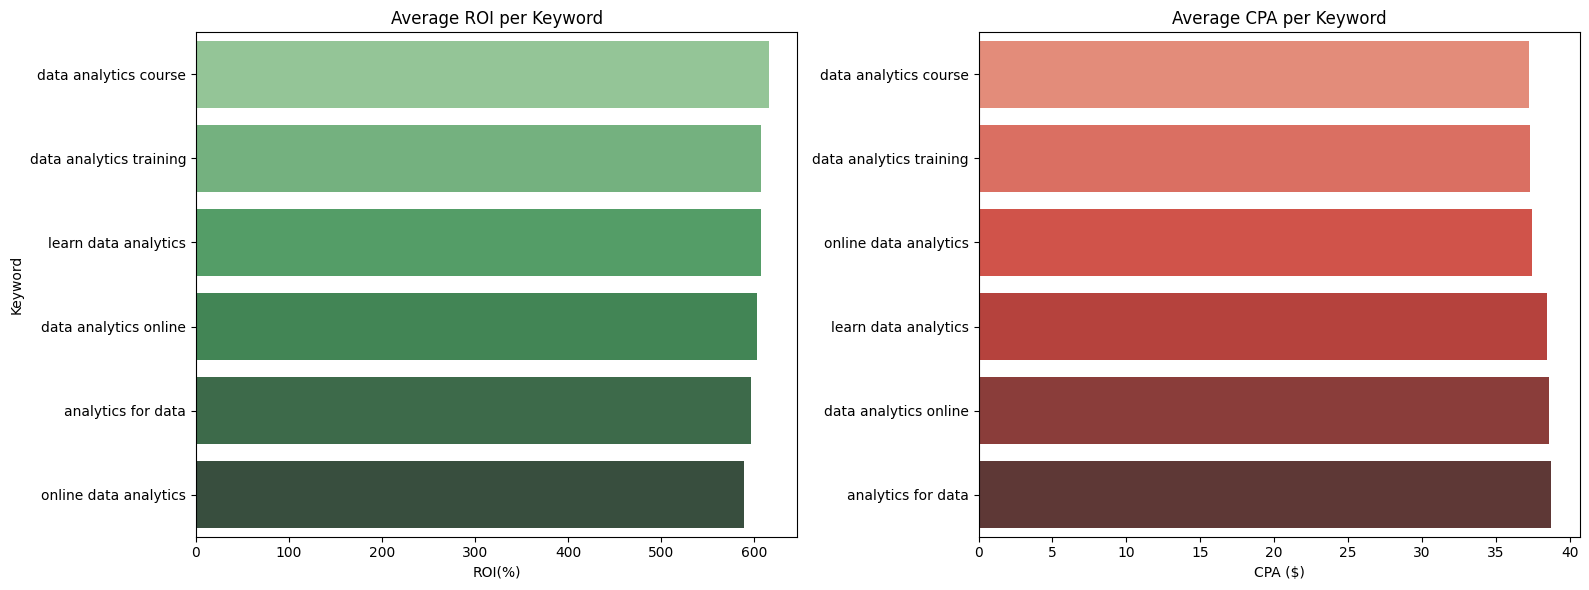

In [31]:
# Hitung rata-rata CPA dan ROI per keyword
keyword_perf = df.groupby('Keyword')[['ROI(%)', 'CPA']].mean().reset_index()

# Membuat dua subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot ROI
sns.barplot(x='ROI(%)', y='Keyword', data=keyword_perf.sort_values(by='ROI(%)', ascending=False),
            ax=axes[0], palette='Greens_d')
axes[0].set_title('Average ROI per Keyword')
axes[0].set_xlabel('ROI(%)')
axes[0].set_ylabel('Keyword')

# Barplot CPA
sns.barplot(x='CPA', y='Keyword', data=keyword_perf.sort_values(by='CPA', ascending=True),
            ax=axes[1], palette='Reds_d')
axes[1].set_title('Average CPA per Keyword')
axes[1].set_xlabel('CPA ($)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- The 'data analytics course' keyword demonstrated the highest average Return on Investment (ROI) and the lowest average Cost Per Acquisition (CPA).
- Conversely, the 'online data analytics' keyword had the lowest average ROI and the highest average CPA.

## Analyze ROI(Return of Invesment) and CPA(Cost Per Acquisition) by Device

/tmp/ipython-input-1449934633.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROI(%)', y='Device', data=keyword_perf.sort_values(by='ROI(%)', ascending=False),
/tmp/ipython-input-1449934633.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CPA', y='Device', data=keyword_perf.sort_values(by='CPA', ascending=True),


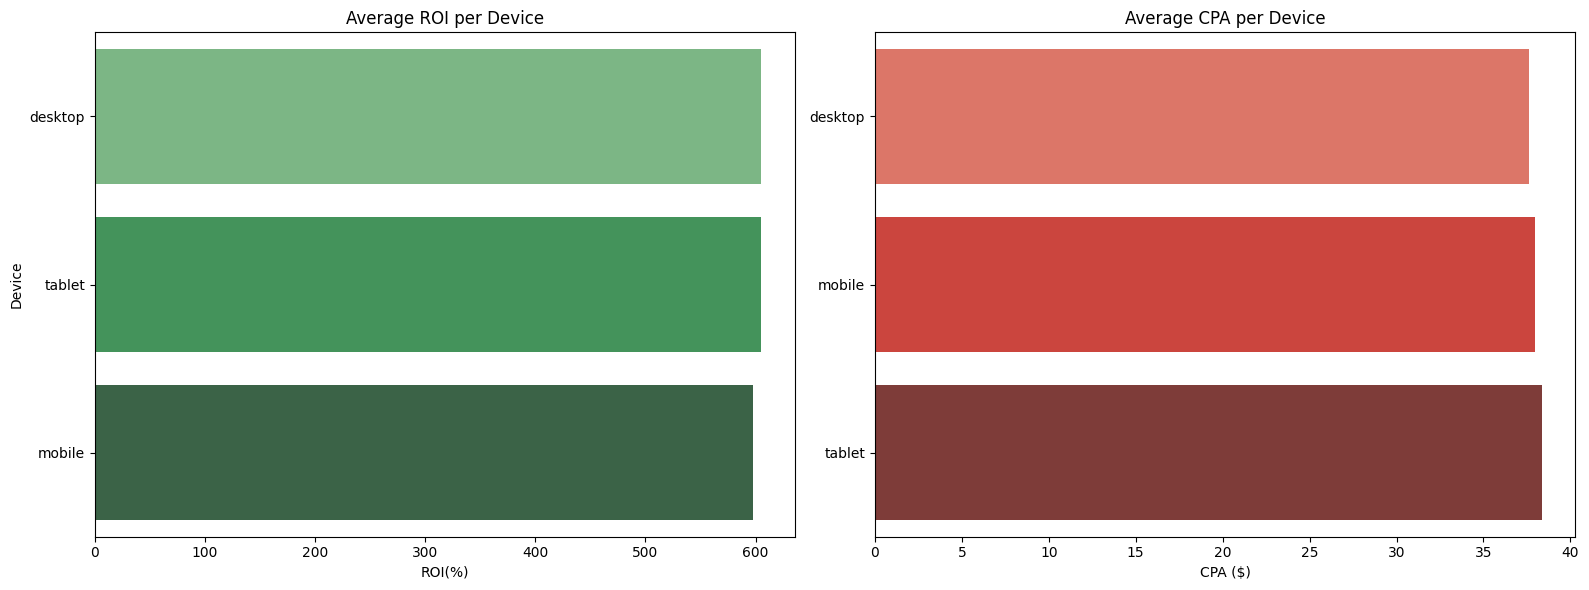

In [48]:
# Hitung rata-rata CPA dan ROI per device
keyword_perf = df.groupby('Device')[['ROI(%)', 'CPA']].mean().reset_index()

# Membuat dua subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot ROI
sns.barplot(x='ROI(%)', y='Device', data=keyword_perf.sort_values(by='ROI(%)', ascending=False),
            ax=axes[0], palette='Greens_d')
axes[0].set_title('Average ROI per Device')
axes[0].set_xlabel('ROI(%)')
axes[0].set_ylabel('Device')

# Barplot CPA
sns.barplot(x='CPA', y='Device', data=keyword_perf.sort_values(by='CPA', ascending=True),
            ax=axes[1], palette='Reds_d')
axes[1].set_title('Average CPA per Device')
axes[1].set_xlabel('CPA ($)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- Desktop devices have the highest average ROI, while Mobile devices have the lowest.
- Desktop devices have the lowest average CPA, while Tablet devices have the highest.

## Investigate Keyword Performance vs. Conversions
Now, let's examine the relationship between keywords and conversions.

/tmp/ipython-input-2313104782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Keyword', y='Conversions', estimator='sum', palette='plasma')


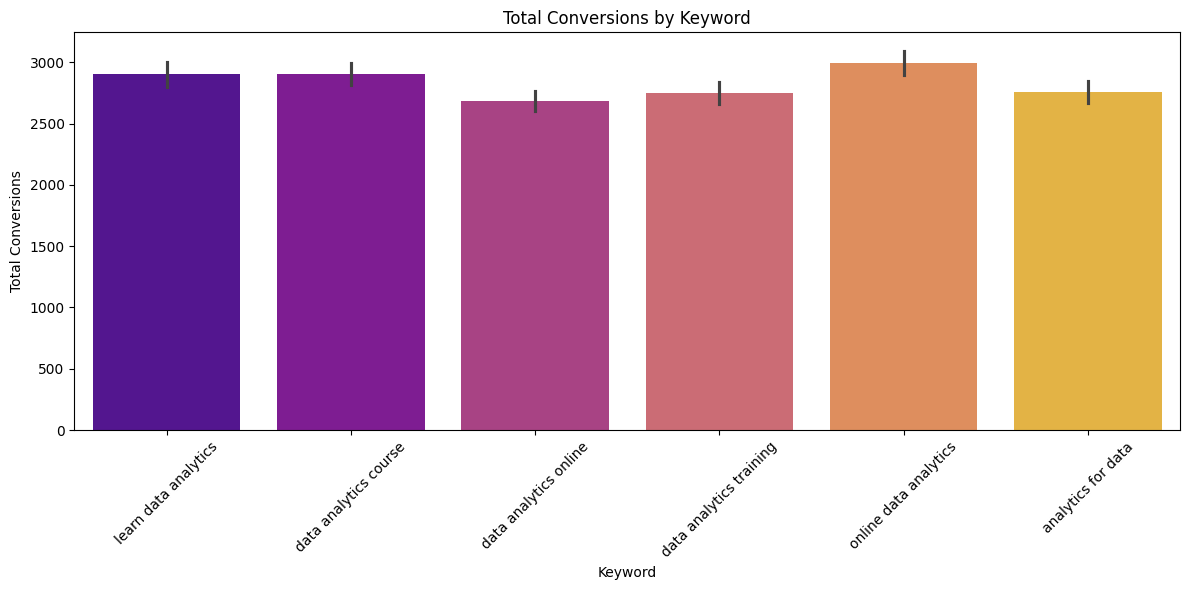

In [33]:
# Analyze Conversions by Keyword
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Keyword', y='Conversions', estimator='sum', palette='plasma')
plt.title('Total Conversions by Keyword')
plt.xlabel('Keyword')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Investigate Device Performance vs. Conversions, Sales
Now, let's examine the relationship between Device with Sales ,conversions.

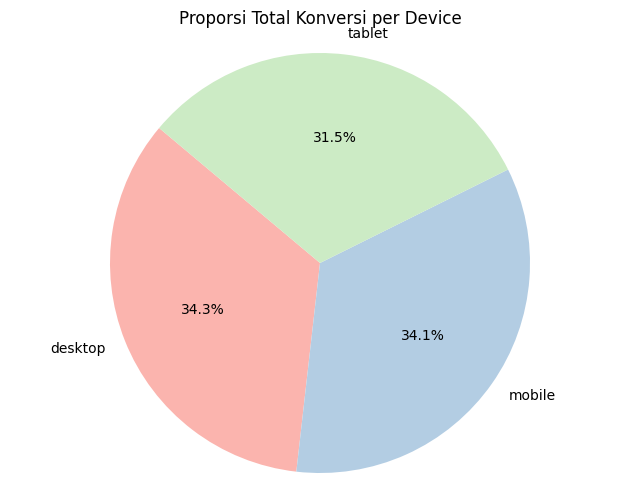

In [38]:
conversions_by_device = df.groupby('Device')['Conversions'].sum()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(conversions_by_device, labels=conversions_by_device.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Proporsi Total Konversi per Device')
plt.axis('equal')  # Buat lingkaran supaya proporsinya benar
plt.show()

/tmp/ipython-input-2770663211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Device', y='Sale_Amount($)', estimator='sum', palette='YlGnBu')


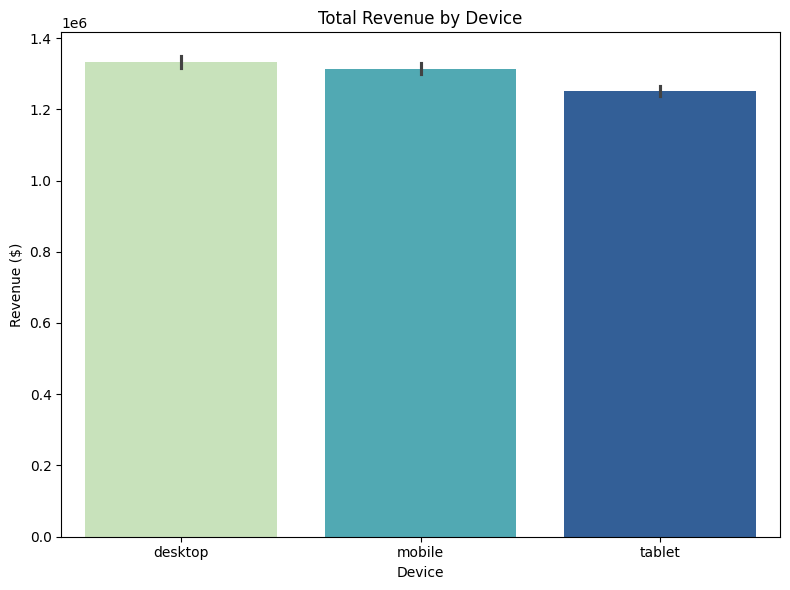

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Device', y='Sale_Amount($)', estimator='sum', palette='YlGnBu')
plt.title('Total Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()



---



## Analyze Click-Through Rates (CTR) by Device and CTR
Let's visualize the average CTR for each device and Keyword to see which segments are most effective at attracting clicks.

/tmp/ipython-input-2953337115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Device', y='CTR(%)', estimator='mean', palette='viridis')


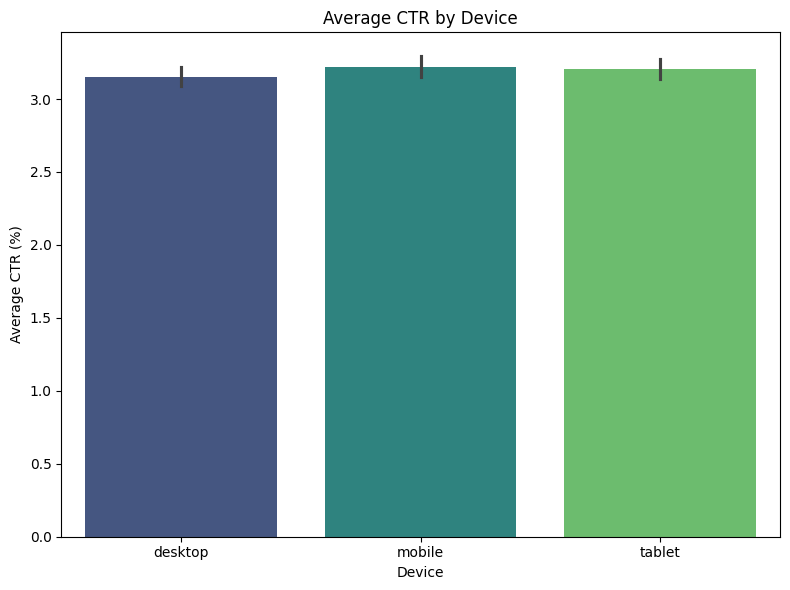

In [41]:
# Analyze CTR by Device
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Device', y='CTR(%)', estimator='mean', palette='viridis')
plt.title('Average CTR by Device')
plt.xlabel('Device')
plt.ylabel('Average CTR (%)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2613691983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Keyword', y='CTR(%)', estimator='mean', palette='viridis')


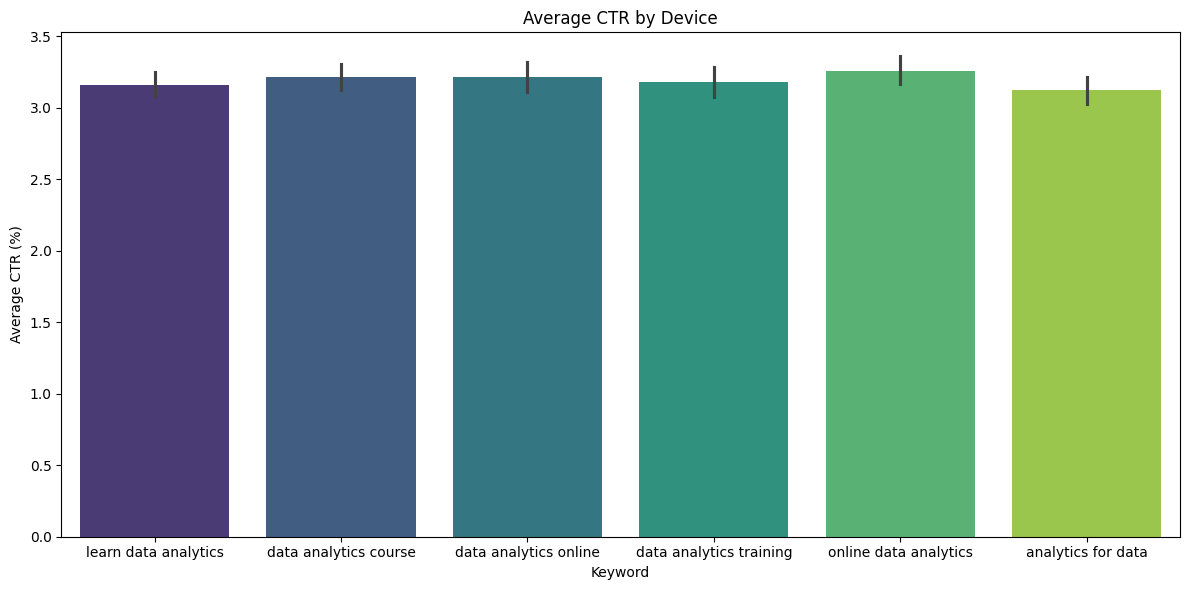

In [47]:
# Analyze CTR by Keyword
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Keyword', y='CTR(%)', estimator='mean', palette='viridis')
plt.title('Average CTR by Device')
plt.xlabel('Keyword')
plt.ylabel('Average CTR (%)')
plt.tight_layout()
plt.show()

In [35]:
# Total revenue (dari kolom Sale_Amount)
total_revenue = df['Sale_Amount($)'].sum()
total_amount = df['Cost($)'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Amount: ${total_amount:,.2f}")

Total Revenue: $3,897,368.00
Total Amount: $559,282.12


# DATA SUMMARY
  Data Quality Insights
- Missing values were identified and imputed for numerical columns (Clicks, Impressions, Cost, Leads, Conversions, Conversion_Rate, Sale_Amount).
- Object type columns were converted from byte strings to standard strings.
- Inconsistent entries in 'Campaign_Name', 'Location', and 'Keyword' were standardized to lower case and consistent naming conventions.
- Currency symbols were removed from 'Cost($)' and 'Sale_Amount($)' columns, and their data types were converted to float.
- 'Ad_Date' was converted to datetime format and split into 'Year', 'Month', and 'Day' columns.
- No duplicate rows were found.

# KEY INSIGHT

Here are the most critical takeaways from the analysis and their potential implications for the Google Ads campaigns:

### 1. November's Performance Surge:
- **Insight:** There was a dramatic and widespread increase in all key performance metrics (Clicks, Impressions, Cost, Leads, Conversions, Conversion Rate, Sale Amount, ROI, CTR, and CPA) in November.
- **Implication:** This suggests a highly successful, potentially promotional or seasonal, event in November. Understanding the specific factors driving this surge (e.g., holiday season, special offers, increased budget allocation, specific targeting strategies) is crucial. Replicating these successful strategies in other relevant periods could significantly boost overall annual performance.

### 2. High-Performing Segments: 'data analytics course' Keyword and Desktop Devices:
- **Insight:** The 'data analytics course' keyword consistently shows the highest average ROI and lowest average CPA. Similarly, Desktop devices deliver the highest average ROI and lowest average CPA.
- **Implication:** These segments represent the most efficient and profitable areas of the current Google Ads strategy. Increasing investment and optimizing campaigns specifically for the 'data analytics course' keyword and Desktop users could lead to maximized returns and lower acquisition costs.

### 3. Low-Performing Segments: 'online data analytics' Keyword and Tablet Devices:
- **Insight:** The 'online data analytics' keyword has the lowest average ROI and highest average CPA. Tablet devices also show lower average ROI and higher average CPA compared to Desktop.
- **Implication:** These segments are less efficient and more costly for acquiring conversions. They require attention and optimization. Potential actions include: refining ad copy and targeting for the 'online data analytics' keyword, improving the mobile and tablet user experience on landing pages, adjusting bids for Tablet devices, or even considering reducing spend on these segments if optimization efforts are not fruitful.

### 4. Inverse Relationship between CPA and ROI:
- **Insight:** A clear inverse relationship exists between CPA and ROI: lower CPA generally correlates with higher ROI.
- **Implication:** This fundamental principle underscores the importance of optimizing for cost efficiency. Continuously monitoring and working to reduce CPA across all campaigns and segments is a key strategy for improving overall profitability.

### 5. Performance Fluctuations within November:
- **Insight:** The daily ROI trend in November exhibited significant volatility.
- **Implication:** While November was a high-performing month overall, the daily fluctuations suggest that campaign effectiveness varied considerably from day to day. Analyzing these daily variations could help identify specific days or periods within the month that were particularly successful (or unsuccessful) and understand the contributing factors (e.g., specific ad creatives, time of day, competitor activity). This could inform more granular optimization strategies.

### 6. Balanced Clicks and Conversions Across Devices:
- **Insight:** Total clicks and conversions are relatively evenly distributed across Desktop, Mobile, and Tablet devices.
- **Implication:** While Desktop and Mobile have slightly higher proportions, this indicates that users on all device types are engaging with the ads and converting. Optimization efforts should consider the user experience and conversion funnel across all devices, even for those with higher CPAs like tablets, to ensure that potential conversions are not lost.


# BUSSINESS RECOMENDATION
Based on the key insights derived from the data analysis, here are actionable recommendations to optimize the Google Ads campaigns and improve overall performance:

### 1. Capitalize on High-Performing Segments:
- **Insight:** 'data analytics course' keyword and Desktop devices show the highest average ROI and lowest average CPA.
- **Recommendation:** Increase budget allocation and bidding for the 'data analytics course' keyword and campaigns targeting Desktop users. Consider creating specific campaigns or ad groups tailored to these high-performing segments with optimized ad copy and landing pages.
- **Expected Impact:** This is expected to increase overall ROI and decrease the average CPA by driving more conversions from the most profitable segments.

### 2. Investigate and Replicate November's Success:
- **Insight:** All key performance metrics experienced a significant surge in November, indicating a highly successful period.
- **Recommendation:** Conduct a detailed post-campaign analysis of the November activities. Identify specific factors such as promotional offers, seasonal events, ad creatives, targeting strategies, landing page experiences, and budget allocation that contributed to the spike. Document these successful elements and plan to replicate them during similar periods or apply applicable strategies to other months.
- **Expected Impact:** Understanding and leveraging the drivers of November's success can lead to increased clicks, impressions, leads, conversions, sale amount, ROI, and CTR in other months, significantly boosting annual performance.

### 3. Optimize or Reallocate from Low-Performing Segments:
- **Insight:** 'online data analytics' keyword and Tablet devices show lower average ROI and higher average CPA.
- **Recommendation:** For the 'online data analytics' keyword, test different ad copies, refine targeting, and improve the landing page experience to increase relevance and conversion rates. For Tablet devices, analyze user behavior to identify potential usability issues on landing pages or during the conversion process. Consider adjusting bids downward for Tablet devices or, if optimization efforts are unsuccessful, reallocating budget to higher-performing devices.
- **Expected Impact:** Optimization can potentially improve the ROI and reduce the CPA for these segments. Reallocation of budget will ensure that spend is focused on areas with better returns.

### 4. Continuously Monitor and Optimize for CPA and ROI:
- **Insight:** There is a clear inverse relationship between CPA and ROI.
- **Recommendation:** Establish a routine monitoring process for CPA and ROI at granular levels (keyword, device, campaign, ad group). Use automated rules or scripts within Google Ads to adjust bids based on target CPA or ROI goals. Regularly review performance data to identify underperforming areas and implement optimization strategies promptly.
- **Expected Impact:** Proactive management of CPA and ROI will ensure that campaign spending is efficient and maximizes profitability over time.

### 5. Analyze Daily Fluctuations in High-Performing Periods:
- **Insight:** The daily ROI in November showed significant volatility.
- **Recommendation:** For high-volume or high-performing periods like November, analyze daily performance data to identify specific days or times with exceptionally high or low ROI. Investigate potential causes such as competitor activity, news events, changes in search interest, or specific ad scheduling. Use this information to refine ad scheduling and bidding strategies for those periods.
- **Expected Impact:** Understanding daily dynamics can help optimize ad delivery and bidding for maximum impact during peak times and minimize wasted spend during low-performing periods.

### 6. Enhance Cross-Device User Experience:
- **Insight:** Clicks and conversions are relatively evenly distributed across devices, but ROI and CPA vary.
- **Recommendation:** While desktop is the most profitable, ensure that the user experience on mobile and tablet devices is seamless and optimized for conversions. This includes fast loading times, mobile-friendly design, easy navigation, and clear calls to action. Test different landing pages and conversion flows across devices.
- **Expected Impact:** Improving the user experience on all devices can potentially increase conversion rates and improve ROI, particularly for mobile and tablet segments.